## REGRESSION

**Question** Do you remember what the regression is?

Today's analysis we will run on dataset 'car-mpg' which has the following columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin and mpg. Mpg is decision attribute and stands for miles per gallon, which basically means the reverse of combustion (pl. spalanie). The dataset comes from https://archive.ics.uci.edu/ml/datasets/auto+mpg However, it does not have the original data, but normalized version.

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot')

In [206]:
df = pd.read_csv('resources/car-mpg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,18.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,15.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,18.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,16.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,17.0


As the first step of the task let's get to know with our data and its distribution.

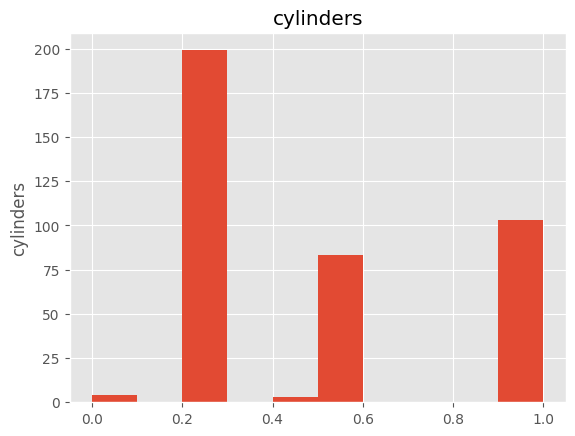

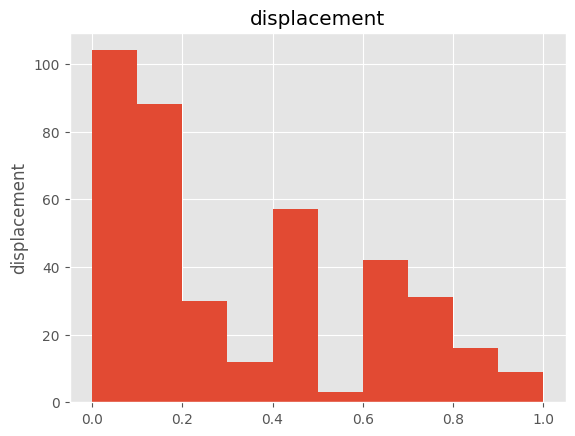

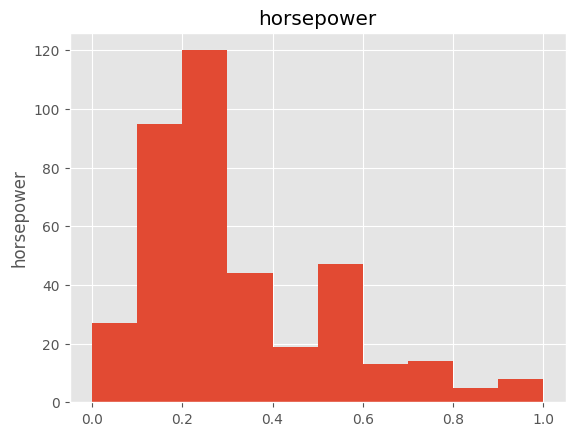

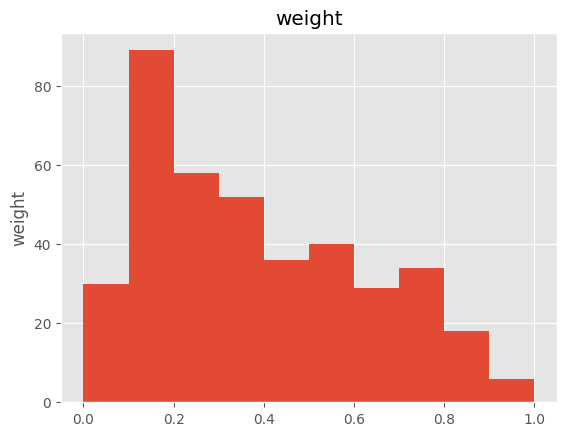

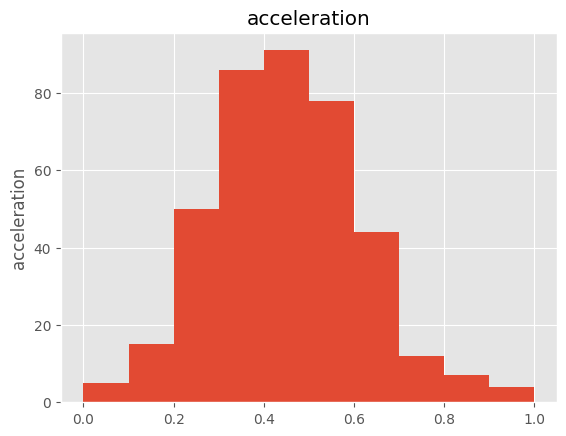

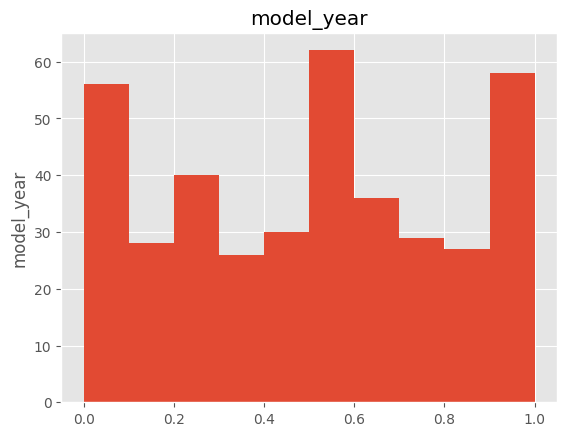

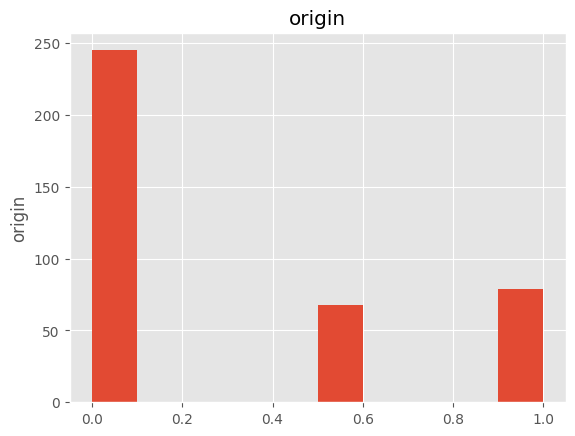

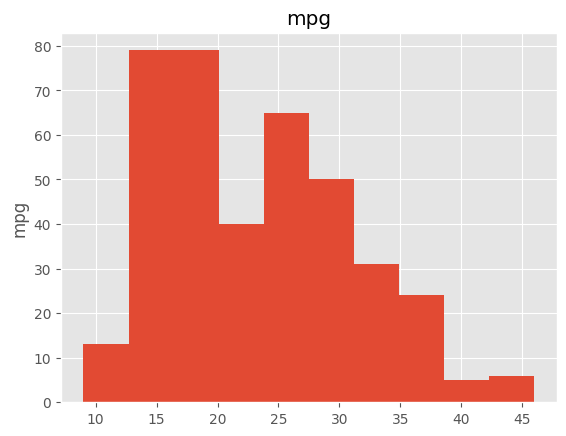

In [207]:
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

# TODO Iterate through the columns (attributes) in our dataset and draw their histograms. 
# Which attributes can be potentially more interesting in further analysis? 
for (i, column) in enumerate(columns):
  plt.hist(df[i])
  plt.title(column)
  plt.ylabel(column)
  plt.show()

### SIMPLE LINEAR REGRESSION

**Task** Write your own function which calculates linear regression step by step and plot the results. <br/>
*Hint* If you do not remember how it was calculated, look here: https://en.wikipedia.org/wiki/Simple_linear_regression

In [208]:
def correlation(x, y):
  from numpy import corrcoef
  return corrcoef(x, y)[0, 1]

def calc_regression_coefficients(x, y):
  from numpy import mean, std, divide

  b = correlation(x, y) * divide(std(y), std(x))
  a = mean(y) - b * mean(x)
  return (a, b)

In [209]:
calc_regression_coefficients(df[2], df[7])

(32.45397418066428, -28.86004913282564)

**Task** As you already wrote your own function which calculates simple linear regression, you can now use implementation from sklearn package. This time split your data to train and test set (use first 40 observations as test ones) and plot your results. Compare the results from your own implementation and this one from sklearn. Did you get similar coefficients for your linear function?

sckikit impl: 26.122364114681048 -15.932167466213295 0.3543035935259362
my impl     : 26.12236411468105 -15.932167466213302 0.3543035935259362


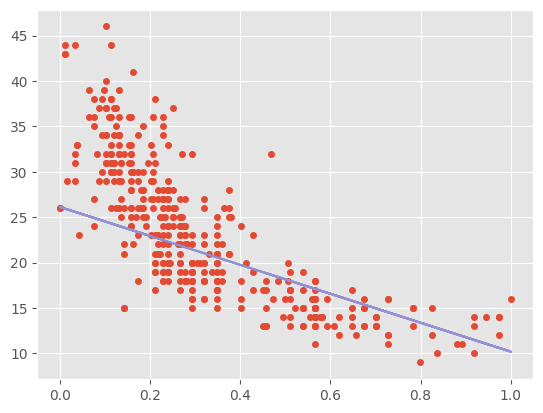

In [210]:
def calc_regression_coefficients_scikit(x, y):
  from sklearn.linear_model import LinearRegression
  x = np.array(x).reshape(-1, 1)
  lr = LinearRegression().fit(x, y)
  return lr.intercept_, lr.coef_[0], lr
(x, y, count) = df[2], df[7], 40
(train, (x_test, y_test)) = ((x[:count], y[:count]), (x[count:], y[count:]))
sk = calc_regression_coefficients_scikit(*train)
my = calc_regression_coefficients(*train)

print('sckikit impl:', sk[0], sk[1], sk[2].score(np.array(x_test).reshape(-1, 1), y_test))
print('my impl     :', my[0], my[1], sk[2].score(np.array(x_test).reshape(-1, 1), y_test))
plt.plot(x, y, 'o', markersize=4)
plt.plot(x, sk[0] + x * sk[1], '-', markersize=4)
plt.plot(x, my[0] + x * my[1], '-', markersize=4)

#### Polynomial regression

We do not have to limit to only simple line but we also can create some other shapes. Run the following codes:

C:\Users\HououinKyouma\AppData\Local\Temp\ipykernel_31456\1589179374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x^2'] = x[2] ** 2


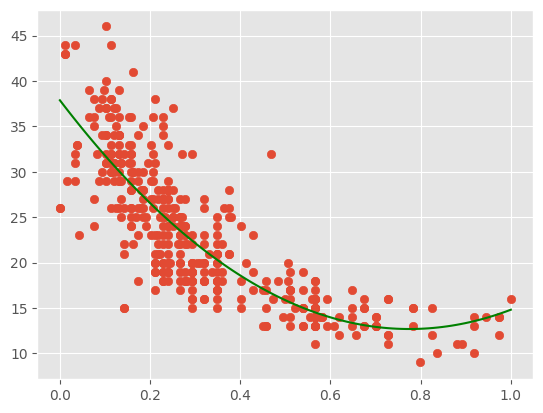

In [211]:
x = df.iloc[:, 2:3]
y = df.iloc[:, -1]

x['x^2'] = x[2] ** 2

reg = linear_model.LinearRegression().fit(x, y)
score = reg.score(x, y)

x_line = np.array(np.linspace(0, 1, 100))
y_line = reg.coef_[1] * x_line ** 2 + reg.coef_[0] * x_line + reg.intercept_

plt.scatter(x[2], y)
plt.plot(x_line, y_line, 'g')

C:\Users\HououinKyouma\AppData\Local\Temp\ipykernel_31456\2466833658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x^2'] = x[4] ** 2
C:\Users\HououinKyouma\AppData\Local\Temp\ipykernel_31456\2466833658.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x^3'] = x[4] ** 3


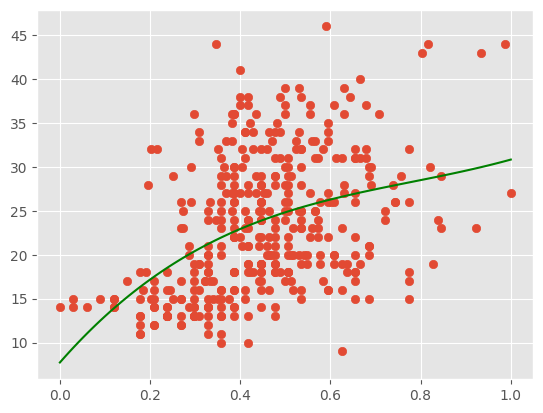

In [212]:
x = df.iloc[:, 4:5]
y = df.iloc[:, -1]

x['x^2'] = x[4] ** 2
x['x^3'] = x[4] ** 3

reg = linear_model.LinearRegression().fit(x, y)
score = reg.score(x, y)

x_line = np.array(np.linspace(0, 1, 100))
y_line = reg.coef_[2] * x_line ** 3 + reg.coef_[1] * x_line ** 2 + reg.coef_[0] * x_line + reg.intercept_

plt.scatter(x[4], y)
plt.plot(x_line, y_line, 'g')

### MULTIPLE LINEAR REGRESSION

**Question** Do you remember how the multiple linear regression works? <br/>

#### GRADIENT DECENT ALGORITHM
Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value). In a real world example, it is similar to find out a best direction to take a step downhill.

**Task** This time you are about to fill missing values in multiple linear regression implementation with the usage of batch gradient decent algorithm.

In [213]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

x['intercept'] = 1

n_iterations = 10000
learning_rate = 0.025

weights = np.zeros((x.shape[1], 1))

for _ in range(n_iterations):
  y_pred = np.dot(x, weights)
  residuals = y_pred - y
  gradient_vector = np.dot(x.T, residuals)
  weights -= learning_rate / x.shape[0] * gradient_vector

# last is the intercept
weights

array([[ -1.13688612],
       [  0.83211488],
       [ -2.19421789],
       [-18.10603232],
       [  0.8794709 ],
       [  8.44020586],
       [  2.62032472],
       [ 25.91509669]])

**Task** You do not need to write your own implementation of multiple linear regression, you can also use sklearn implementation. This time your function should have params: independent variables *x* and dependent variable *y* and return (or just print) score and coefficients of the function (.coef_ and .intercept_).

In [214]:
def calc_multiple_regression_coefficients(x, y):
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression().fit(x, y)
  return lr.coef_, lr.intercept_[0]

calc_multiple_regression_coefficients(x, y)

(array([[ -2.63758008,   7.99990787,  -3.02421131, -22.97490448,
           1.63552668,   8.5886846 ,   2.86000053,   0.        ]]),
 25.984487967176317)

**Question** Compare the results from two above methods. Are they similar?

Answer: Yes, they are similar.

## SIGNIFICANCE REGRESSION COEFFICIENT

We can statistically check if the model (or specific parameter) is significant.

#### GLOBAL

**Task** Implement global test for checking significance. Fill the following methods according to your knowledge from the lecture.

In [311]:
def calc_ssr(y, y_pred):
  return np.sum(np.square(np.mean(y) - y_pred))

def calc_sse(y, y_pred):
  return np.sum(np.square(y - y_pred))

def calc_f(y, y_pred, n, m):
  return calc_ssr(y, y_pred) * (n - m) / (calc_sse(y, y_pred)) * (m - 1)

def calc_significance_regression_coefficient(x, y):
  import sklearn.model_selection as ms
  import scipy.stats as ss
  (x_train, x_test, y_train, y_test) = ms.train_test_split(x, y, test_size=0.85)

  reg = linear_model.LinearRegression().fit(x_train, y_train)
  y_pred = reg.predict(x_test)
  n = len(y_pred)

  m = 2
  f = calc_f(y_test, y_pred, n, m)
  p = 1 - ss.f.cdf(f, m - 1, m - 1)
  return f, p

f, p = calc_significance_regression_coefficient(np.array(df[2]).reshape(-1, 1), np.array(df[7]))
print(f, p)

445.1939093838774 0.030149537851117625


In [313]:
xx = df.iloc[:, :-1].values
yy = df.iloc[:, -1:].values[:, 0]

In [315]:
f, p = calc_significance_regression_coefficient(xx, yy)

print(f)
if p < 0.05:
  print(" confirm " + str(p))
else:
  print(" reject " + str(p))

1443.9111892130927
 confirm 0.01674980106300794


Let's check the correctness of your function.

In [317]:
sm_stats = sm.OLS(yy, sm.add_constant(xx)).fit()
print(sm_stats.fvalue)

246.70779461475374


#### LOCAL

**Task** Now check the significance of each criterion. As the equation for global version is more general, we can use the function that was previously written.

In [321]:
for i in range(xx.shape[1]):
  f, p = calc_significance_regression_coefficient(np.array(xx[:, i]).reshape(-1, 1), yy)
  print(f)
  if p < 0.05:
    print(" confirm " + str(p))
  else:
    print(" reject " + str(p))


505.26599148677985
 confirm 0.028303088049966507
657.5775625539532
 confirm 0.024813419976512097
377.6656095971996
 confirm 0.03272981326094937
802.5598572974534
 confirm 0.02246265696020988
84.15260399962415
 reject 0.06912495667177077
166.50624987681252
 confirm 0.04923769137221545
77.3404007386933
 reject 0.07208012501101269


## OUTLIERS

**Question** What is an outlier?
Answer: an observation which is greatly different from average observation

Let's look at the boxplot below. The points which are at the top and bottom of chart are outliers.

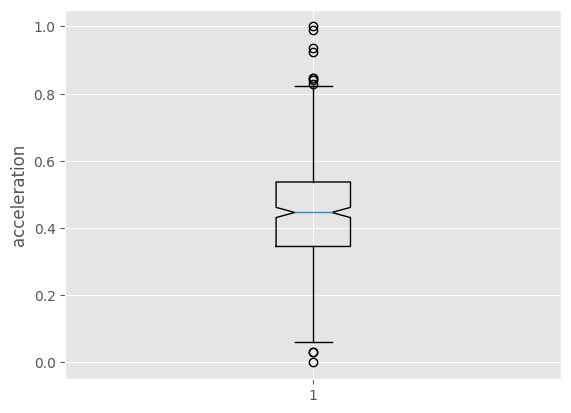

In [322]:
plt.boxplot(df[4], 1)
plt.ylabel(columns[4])
plt.show()

The method that is used in this type of charts to determine outliers bases on quartiles. Firstly, we need to calculate IQR which stands for interquartile range and is the difference between the third and the first quartile. Usually stating the limit of whiskers is: [Q1-IQR * 1.5, Q3 + IQR * 1.5]. All values that are outside this range are treated as outliers. It is connected with normal distribution and distance greater than 3 std dev.

However, this method cannot cope correctly with multidimensional data. There can be outliers that are still close to median but overall are far from other points. 

We will use *statsmodel* package which calculates a few interesting measures.

In [323]:
df.columns = columns
model = sm.OLS(df.iloc[:, -1], df.iloc[:, :-1])
results = model.fit()
influence = results.get_influence()
summary = influence.summary_frame()
summary

,dfb_cylinders,dfb_displacement,dfb_horsepower,dfb_weight,dfb_acceleration,dfb_model_year,dfb_origin,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.149282,-0.021409,-0.031690,-0.061572,0.012817,-0.079705,0.021783,0.007391,1.689373,0.017805,0.227457,1.693466,0.228009
1,0.009129,0.009879,0.016853,-0.028737,0.010857,-0.014861,-0.000579,0.000353,0.367664,0.017946,0.049701,0.367251,0.049645
2,0.095248,-0.012133,0.047838,-0.093244,0.021120,-0.046328,-0.008468,0.004310,1.229393,0.019572,0.173699,1.230213,0.173814
3,0.047541,-0.018843,0.026841,-0.034825,0.013350,-0.023969,-0.011712,0.000775,0.492683,0.021861,0.073655,0.492198,0.073582
4,0.166939,-0.060634,0.027323,-0.070768,-0.011399,-0.058356,0.001045,0.007476,1.640072,0.019084,0.228762,1.643693,0.229267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.020033,-0.000269,0.006696,0.012212,-0.006055,0.034577,-0.019155,0.000349,0.362243,0.018269,0.049415,0.361834,0.049359
388,0.006583,-0.020696,0.008191,0.025776,-0.044878,-0.005101,0.011007,0.000600,-0.415262,0.023779,-0.064811,-0.414815,-0.064741
389,-0.058754,0.029140,0.068237,-0.045877,-0.084620,0.262453,-0.087121,0.011348,1.941096,0.020648,0.281847,1.948130,0.282868
390,0.019040,0.009695,-0.021770,-0.004832,-0.019809,-0.043734,0.051242,0.001008,-0.634682,0.017219,-0.084011,-0.634189,-0.083946


**Task** Visualize residuals (*standard_resid*) with the usage of scatterplot. Draw also horizontal line on y-value = 0. Look at the chart. Are these values in a narrow row on y-value or you can identify that there are some outliers?

#### DFFITS

This measure calculates the influence of i-th example on our regression equation by omitting this observation and comparing this model to previous one. Boundary values for our influential observations are +/- 2 * sqrt(1/number of observations)

**Task** Draw a plot where you visualise values of dffits as vertical lines (see: plt.vlines()) and horizontal lines (plt.axhline()) equal to boundaries of influential observations.

In [ ]:
#TODO

**Task** Get indices of those observations that are influential for diffits.

In [ ]:
#TODO

#### COOK'S DISTANCE

Comparing to the previous, there is also made checking the influence of each observation. However, this time we check the difference of coefficients in our regression equation while we omit the i-th observation. The boundary of the influence is very often set to 4/number of observations.

**Task** Once again draw a plot where you visualise values of cooks_d as vertical lines and horizontal line equal to boundary of influential observations. *Tip* It might be useful to visualize square root of the values to make the chart more transparent.

In [ ]:
#TODO

**Task** Get indices of those observations that are influential for Cook's distance.

In [ ]:
#TODO

**Task** Check if there are elements that appear on both lists. Maybe one list is subset of the second?

In [ ]:
#TODO